## Predict Customer Personality to Boost Marketing Campaign

**Table of Content:**

- Introduction
- Load Dataset
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
- Save Model

# Introduction

**Background**

Dengan memahami apa yang pelanggan sukai, butuhkan, dan bagaimana mereka membeli produk kita, kita bisa memberikan layanan yang lebih baik sesuai dengan kebutuhan mereka. Dengan memahami pelanggan, kita bisa memberikan pengalaman yang lebih menyenangkan dan memuaskan bagi mereka. Hal ini akan membuat pelanggan lebih puas dan akhirnya akan meningkatkan penjualan kita. Untuk memahami pelanggan, kita bisa menggunakan metode pengelompokkan. Dengan pengelompokkan, kita bisa membagi pelanggan menjadi kelompok-kelompok berdasarkan karakteristiknya. Hal ini akan membantu kita menyusun strategi penjualan yang lebih efektif dan sesuai dengan kebutuhan setiap kelompok pelanggan. Oleh karena itu, memahami pelanggan adalah hal yang penting untuk meningkatkan penjualan dan mencapai kesuksesan jangka panjang bagi perusahaan.

**Goal**

Tujuan dari analisis profil dan perilaku pelanggan dengan pendekatan clustering adalah untuk meningkatkan pemahaman perusahaan tentang pelanggan. Dengan pemahaman yang lebih baik tentang pelanggan, perusahaan dapat menyediakan layanan yang lebih personal, meningkatkan performa penjualan, dan membangun hubungan yang kuat dengan pelanggan.

**Objective**

Berikut adalah objective dari analisis profil dan perilaku pelanggan dengan pendekatan clustering, dalam kalimat yang lebih mudah dipahami:

- Membuat model machine learning yang dapat mengelompokkan pelanggan berdasarkan karakteristik dan perilaku mereka.
Tujuan pertama adalah membuat model yang dapat membagi pelanggan menjadi kelompok-kelompok berdasarkan ciri-ciri dan cara mereka berperilaku.

- Mengekstraksi insight yang lebih mendalam tentang profil dan perilaku pelanggan.
Tujuan kedua adalah memahami lebih lanjut tentang pelanggan, seperti apa yang mereka sukai, butuhkan, dan bagaimana mereka berperilaku.

- Menentukan strategi bisnis yang efektif dari hasil clustering.
Tujuan ketiga adalah menggunakan pemahaman tentang pelanggan untuk membuat strategi bisnis yang lebih efektif.

**Business Matric**

Conversion Rate

| Feature | Description |
| --- | --- |
| `ID` | ID unik dari setiap pelanggan |
| `Year_Birth` | tahun kelahiran pelanggan |
| `Dt_Customer` | tanggal pendaftaran pelanggan dengan perusahaan (gabung member) |
| `Education` | tingkat pendidikan pelanggan |
| `Marital_Status` | status pernikahan pelanggan |
| `Kidhom` | jumlah anak kecil dalam rumah tangga pelanggan |
| `Teenhom` | jumlah remaja dalam rumah tangga pelanggan |
| `Income` | pendapatan rumah tangga pelanggan per tahun |
| `MntFishProducts` | jumlah yang dibelanjakan untuk produk ikan dalam 2 tahun terakhir |
| `MntMeatProducts` | jumlah yang dibelanjakan untuk produk daging dalam 2 tahun terakhir |
| `MntFruits` | jumlah yang dibelanjakan untuk produk buah-buahan dalam 2 tahun terakhir |
| `MntSweetProducts` | jumlah yang dibelanjakan untuk produk manis dalam 2 tahun terakhir |
| `MntWines` | jumlah yang dibelanjakan untuk produk anggur dalam 2 tahun terakhir |
| `MntGoldProds` | jumlah yang dibelanjakan untuk produk emas dalam 2 tahun terakhir |
| `NumDealsPurchases` | jumlah pembelian yang dilakukan dengan diskon |
| `NumCatalogPurchases` | jumlah pembelian yang dilakukan dengan menggunakan katalog (membeli barang yang akan dikirim melalui pos) |
| `NumStorePurchases` | jumlah pembelian yang dilakukan secara langsung di toko |
| `NumWebPurchases` | jumlah pembelian yang dilakukan melalui situs web perusahaan |
| `NumWebVisitsMonth` | jumlah kunjungan ke situs web perusahaan dalam satu bulan terakhir |
| `Recency` | jumlah hari sejak pembelian terakhir |
| `Response` | 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak |

# Load Dataset

## Read Dataset

In [2]:
# mengimport library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import yellowbrick

In [3]:
color =  ['steelblue', 'indianred', 'grey', 'orange', 'olive']

In [4]:
# read dataset
df = pd.read_csv('marketing_campaign_data.csv')

In [5]:
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1873,1873,6715,1948,S3,Lajang,60200000.0,0,1,02-01-2013,3,...,6,0,0,0,0,0,0,3,11,0
193,193,1324,1988,S1,Menikah,38872000.0,1,0,30-05-2013,93,...,8,0,0,0,0,0,0,3,11,0
1400,1400,4094,1961,S1,Menikah,60544000.0,1,1,25-08-2012,92,...,6,0,0,0,0,0,0,3,11,0
1393,1393,5289,1975,D3,Lajang,41658000.0,1,1,09-11-2012,30,...,4,0,0,0,0,0,0,3,11,0
1449,1449,1927,1973,D3,Bertunangan,69401000.0,0,1,23-03-2014,41,...,2,0,0,0,0,0,0,3,11,0


## Overview Dataset

In [6]:
df.shape

(2240, 30)

In [7]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.00,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.00,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,0,0.00,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,0,0.00,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,0,0.00,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,24,1.07,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,0,0.00,3,"[0, 1, 2]"
7,Teenhome,int64,0,0.00,3,"[0, 1, 2]"
8,Dt_Customer,object,0,0.00,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
9,Recency,int64,0,0.00,100,"[58, 38, 26, 94, 16]"


In [8]:
df.duplicated().sum()

0

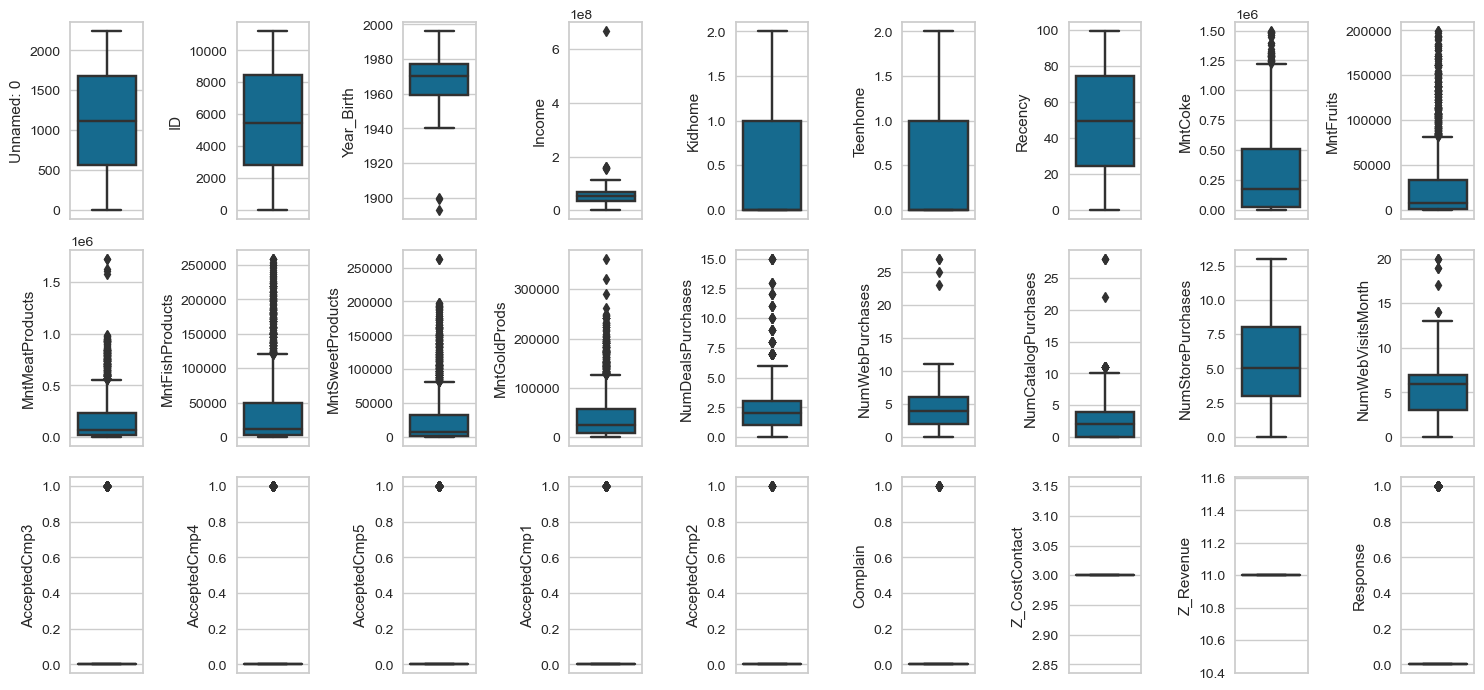

In [9]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

### **Key Takeaways**

Berikut adalah key takeaways dari data yang diberikan:

- **Jumlah data**
Dataset terdiri dari **30 fitur dan 2240 baris**. Jumlah data yang cukup besar ini memungkinkan untuk dilakukan analisis yang lebih mendalam.

- **Missing value**
Missing value terdapat pada fitur **Income**. Missing value ini perlu ditangani sebelum dilakukan analisis.

- **Data duplikat**
Tidak ada data yang duplikat. Hal ini menunjukkan bahwa data sudah dibersihkan dengan baik.

- **Outlier**
Secara keseluruhan data cenderung memiliki outlier. Nilai ekstrim terlihat pada fitur **Income dan Year_Birth**. Outlier ini perlu ditangani agar tidak mempengaruhi hasil analisis.

- **Analisis konversi rate**
Pada tahap Exploratory Data Analysis, akan dilakukan analisis konversi rate. Analisis ini bertujuan untuk mencari wawasan dari data persentase pengunjung sebuah situs web dan tindakan apa yang mereka lakukan selama mengunjungi situs tersebut, serta apakah tindakan mereka menghasilkan transaksi pembelian atau tidak selama kunjungan di situs web tersebut.

- **Proses pembersihan data dan pengembangan fitur**
Sebelum melakukan analisis konversi rate, akan dilakukan proses pembersihan data (data cleaning) dan pengembangan fitur (feature engineering) pada variabel data yang ada. Hal ini dilakukan untuk menghasilkan sebuah kolom baru yang disebut Conversion rate, serta beberapa kolom fitur lain seperti umur, penghasilan, pengeluaran, dan sebagainya. Dengan adanya fitur-fitur ini, diharapkan dapat menemukan pola perilaku konsumen yang dapat memberikan informasi berharga dalam analisis konversi rate.

### **Rekomendasi**

Berdasarkan key takeaways yang telah disebutkan, berikut adalah beberapa rekomendasi untuk analisis data yang akan dilakukan:

- **Penanganan missing value**
Missing value pada fitur Income dapat ditangani dengan menggunakan metode imputation, seperti mean imputation atau median imputation. Metode imputation yang dipilih harus disesuaikan dengan karakteristik data.

- **Penanganan outlier**
Outlier pada fitur Income dan Year_Birth dapat ditangani dengan menggunakan metode outlier detection, seperti metode IQR. Metode outlier detection yang dipilih harus disesuaikan dengan karakteristik data.

- **Pengembangan fitur**
Pengembangan fitur baru dapat dilakukan dengan menggunakan metode feature engineering. Metode feature engineering yang dipilih harus disesuaikan dengan tujuan analisis yang ingin dilakukan.

Dengan melakukan penanganan missing value, penanganan outlier, dan pengembangan fitur, diharapkan data yang digunakan untuk analisis konversi rate menjadi lebih bersih dan akurat. Hal ini dapat menghasilkan analisis yang lebih berkualitas dan memberikan informasi yang lebih berharga bagi perusahaan.

## Data Cleaning

In [10]:
df1 = df.copy()

In [11]:
df1.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Handling Outlier

In [12]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 1840


Hasil sesudah dilakukan handling outlier.

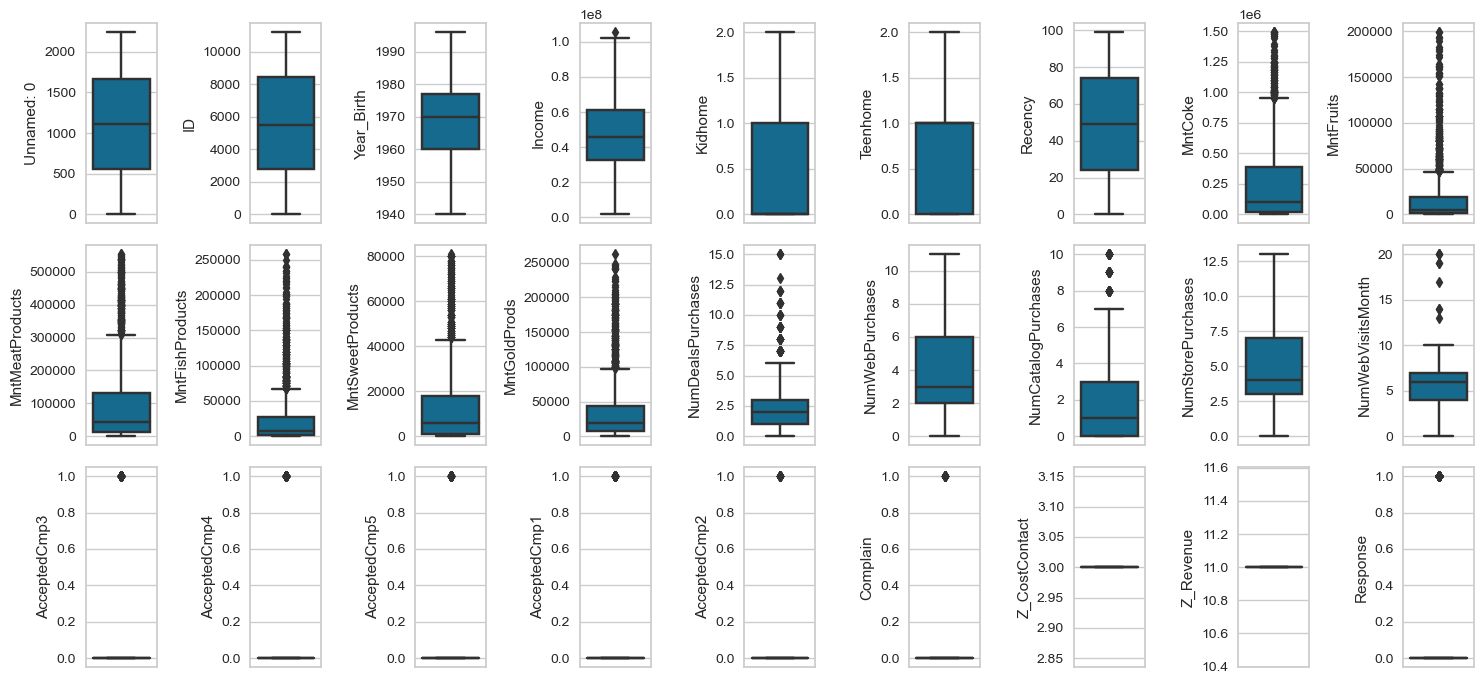

In [13]:
nums = df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns.tolist()
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df1[nums[i]], orient='v')
    plt.tight_layout()

### Handling Missing Value

Handling missing value dilakukan dengan imputasi nilai median (robust)

In [14]:
df1.fillna(df1['Income'].median(), inplace=True)

In [15]:
df1.isna().sum().sum()

0

## Feature Engineering

### Membership Duration

Membuat fitur durasi membership dari fitur Dt_Customer

In [16]:
# konversi ke datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

# membuat kolom baru durasi membership
# ------------------------------------------------------------
df1['Membership_Duration'] = 2023 - df1['Dt_Customer'].dt.year

In [17]:
df1['Membership_Duration'].value_counts()

10    975
9     471
11    394
Name: Membership_Duration, dtype: int64

### Customer Age

Usia pelanggan dapat diekstraksi dari fitur Year_Birth

In [18]:
# menambahkan kolom usia
df1['Age'] = 2023 - df1['Year_Birth']

In [19]:
print(f'min age: {df1.Age.min()}')
print(f'max age: {df1.Age.max()}')

min age: 27
max age: 83


In [20]:
# mengkategorikan berdasarkan usia
df1['Age_Categories'] = np.where(df1['Age'] < 40, 'Young Adult',
                      np.where(df1['Age'] < 60, 'Middle-Aged Adult',
                               'Old Adult'))

In [21]:
df1['Age_Categories'].value_counts()

Middle-Aged Adult    1038
Old Adult             597
Young Adult           205
Name: Age_Categories, dtype: int64

## Total Children

Fitur ini merepresentasikan jumlah anak yang dimiliki oleh pelanggan



In [22]:
# total anak
df1['Total_Children'] = df1['Kidhome'] + df1['Teenhome']

In [23]:
df1['Total_Children'].value_counts()

1    1027
2     405
0     359
3      49
Name: Total_Children, dtype: int64

## Total Transaction

Fitur ini merepresentasikan total keseluruhan transaksi yang telah dilakukan oleh pelanggan.

In [24]:
df1['Total_Transaction'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

In [25]:
df1['Total_Transaction'].value_counts()

7     148
5     143
4     124
6     122
9     100
8      93
17     89
16     81
10     78
21     69
12     68
20     67
11     64
15     61
23     59
19     59
22     56
18     53
14     47
25     44
26     43
13     40
24     35
27     27
28     25
32     11
31      9
29      8
30      7
2       2
1       2
0       2
34      2
35      1
33      1
Name: Total_Transaction, dtype: int64

## Total Spending

Fitur ini merepresentasikan total pengeluaran pelanggan dari keseluruhan pembelian yang telah dilakukan.

In [28]:
df1['Total_Spending'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] 
+ df1['MntSweetProducts'] + df1['MntGoldProds']

1        7000
2       63000
3        8000
4       42000
5       56000
        ...  
2234    11000
2236     8000
2237    36000
2238    91000
2239    22000
Length: 1840, dtype: int64

In [29]:
df1['Total_Spending'].value_counts()

39000      34
32000      23
16000      23
19000      22
37000      22
           ..
441000      1
1116000     1
1057000     1
1217000     1
752000      1
Name: Total_Spending, Length: 724, dtype: int64

## Total Accepted Campaign

Fitur ini merepresentasikan total campaign yang diterima oleh pelanggan secara keseluruhan.

In [30]:
df1['Total_Accepted_Campaign'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']

In [31]:
df1['Total_Accepted_Campaign'].value_counts()

0    1520
1     245
2      53
3      15
4       7
Name: Total_Accepted_Campaign, dtype: int64

## Conversion Rate

Conversion Rate = (total transaction/total web visit)*100

In [32]:
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df1['CVR'] = round(df1.apply(lambda x: cvr(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1), 2)

In [33]:
df1['CVR'].value_counts()

1.00    120
2.00     61
0.71     42
4.00     42
3.00     42
       ... 
0.05      1
9.67      1
5.80      1
5.83      1
3.38      1
Name: CVR, Length: 165, dtype: int64

# Exploratory Data Analysis

In [34]:
df2 = df1.copy()

In [35]:
# numerical feature
nums = df2.loc[:, (df2.dtypes == 'int64') | (df2.dtypes == float)].columns.tolist()
nums = nums[3:]
print(nums)
print(len(nums))

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Membership_Duration', 'Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'CVR']
31


In [36]:
# categorical fearure
cats = df2.loc[:, (df2.dtypes == 'object')].columns.tolist()
print(cats)

['Education', 'Marital_Status', 'Age_Categories']


## Statistical Summary

In [38]:
n_feats = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Total_Children', 
           'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'CVR']

In [39]:
df2[n_feats].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,1840.0,46945913.59,18665446.62,1730000.0,32892000.00,46014500.0,61297250.0,105471000.0
Recency,1840.0,48.55,28.91,0.0,24.00,49.0,74.0,99.0
Membership_Duration,1840.0,9.96,0.68,9.0,9.00,10.0,10.0,11.0
Age,1840.0,53.98,11.48,27.0,46.00,53.0,63.0,83.0
Total_Children,1840.0,1.08,0.72,0.0,1.00,1.0,1.0,3.0
Total_Transaction,1840.0,13.58,7.42,0.0,7.00,12.0,20.0,35.0
Total_Spending,1840.0,391777.17,444228.42,3000.0,41000.00,199500.0,659250.0,2145000.0
Total_Accepted_Campaign,1840.0,0.23,0.57,0.0,0.00,0.0,0.0,4.0
CVR,1840.0,3.29,3.66,0.0,1.12,2.0,4.0,27.0


### **Key Takeaways**

Berikut adalah key takeaways dari data yang diberikan:

- **Profil pelanggan**
    - Mayoritas pelanggan memiliki income Rp51.371.000/tahun, tergolong kelas menengah ke atas.
    - Mayoritas jarak pelanggan akan berbelanja lagi sekitar 1,5 bulan setelah pembelanjaan terakhir, menunjukkan bahwa pelanggan cenderung loyal.
    - Mayoritas pelanggan telah menjadi member selama 10 tahun, menunjukkan bahwa pelanggan memiliki pengalaman yang lama dengan perusahaan.
    - Mayoritas pelanggan hanya memiliki satu anak, menunjukkan bahwa pelanggan cenderung berusia muda atau dewasa awal.
    

- **Perilaku pelanggan**
    - Mayoritas pelanggan melakukan 15 transaksi, menunjukkan bahwa pelanggan aktif berbelanja.
    - Mayoritas pelanggan berbelanja mengeluarkan biaya Rp.396.500, menunjukkan bahwa pelanggan memiliki daya beli yang cukup tinggi.
    - Mayoritas pelanggan tidak menerima campaign, menunjukkan bahwa pelanggan tidak terlalu aktif dalam mengikuti promosi.
    - Konversi kunjungan web dengan pembelian mayoritas pelanggan hanya sebesar 5.35%, menunjukkan bahwa perusahaan perlu meningkatkan upaya untuk meningkatkan konversi.

### **Rekomendasi**

Berdasarkan key takeaways yang telah disebutkan, berikut adalah beberapa rekomendasi untuk perusahaan:

- **Menentukan target pasar**
    - Perusahaan dapat menargetkan pelanggan dengan income Rp51.371.000/tahun, berusia muda atau dewasa awal, dan memiliki satu anak.

- **Meningkatkan frekuensi pembelian**
    - Perusahaan dapat melakukan promosi atau penawaran khusus untuk mendorong pelanggan untuk berbelanja lebih sering.

- **Meningkatkan nilai pesanan rata-rata**
    - Perusahaan dapat menawarkan produk atau layanan baru yang menarik untuk meningkatkan nilai pesanan rata-rata.

- **Meningkatkan konversi kunjungan web**
    - Perusahaan dapat melakukan optimasi situs web untuk meningkatkan pengalaman pengguna dan mendorong pelanggan untuk melakukan pembelian.

Dengan menerapkan rekomendasi-rekomendasi tersebut, perusahaan dapat meningkatkan penjualan dan keuntungan.